In [7]:
import os

import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2
import numpy as np
from ast import literal_eval
from tqdm import tqdm
import toolsets.spectra_operations as so
from toolsets.file_io import read_msp_files
master_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/NIST_MONA'
reference_db_sorted = pd.read_csv('/Users/fanzhoukong/Documents/GitHub/Libgen_data/formula_db/formulaDB_sorted.csv')
# nist = pd.read_csv((os.path.join(master_dir, 'NIST_20.csv')))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
msms = []
for index, row in tqdm(nist.iterrows(), total = len(nist)):
    msms.append(so.convert_nist_to_string(literal_eval(row['spectrum'])))

100%|██████████| 1026712/1026712 [02:50<00:00, 6015.05it/s]


In [32]:
nist

,Unnamed: 0,spectrum,Name,Notes,Precursor_type,Spectrum_type,Instrument_type,Instrument,Sample_inlet,Ionization,...,Comment,Unique_scan_number,Spectrum_id,Precursormz,Smiles,Num peaks,Related_casno,Msn_pathway,Link,msms
0,0,"[[45.96, 46.35], [597.48, 51.85], [598.5, 41.3...","1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",Consensus spectrum; Water/isopropanol/Formic a...,[M+NH4]+,MS2,Q-TOF,Agilent QTOF 6530,direct flow injection,ESI,...,NIST Mass Spectrometry Data Center,686788362415694984,1,1467.0061,CCCCCC=CCC=CCCCCCCCC(=O)OC[CH](COP(=O)(O)OCC(O...,15,NaN,NaN,NaN,45.96\t46.35\n597.48\t51.85\n598.5\t41.36\n599...
1,1,"[[597.5, 50.95], [599.5, 683.32], [1449.98, 99...","1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",Consensus spectrum; Water/isopropanol/Formic a...,[M+NH4]+,MS2,Q-TOF,Agilent QTOF 6530,direct flow injection,ESI,...,NIST Mass Spectrometry Data Center,686788362415694985,2,1467.0061,CCCCCC=CCC=CCCCCCCCC(=O)OC[CH](COP(=O)(O)OCC(O...,10,NaN,NaN,NaN,597.5\t50.95\n599.5\t683.32\n1449.98\t999.0\n1...
2,2,"[[537.39, 55.94], [599.5, 999.0], [600.51, 42....","1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",Consensus spectrum; Water/isopropanol/Formic a...,[M+NH4]+,MS2,Q-TOF,Agilent QTOF 6530,direct flow injection,ESI,...,NIST Mass Spectrometry Data Center,686788362415694986,3,1467.0061,CCCCCC=CCC=CCCCCCCCC(=O)OC[CH](COP(=O)(O)OCC(O...,5,NaN,NaN,NaN,537.39\t55.94\n599.5\t999.0\n600.51\t42.26\n14...
3,3,"[[597.46, 41.86], [598.5, 45.15], [599.51, 999...","1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",Consensus spectrum; Water/isopropanol/Formic a...,[M+NH4]+,MS2,Q-TOF,Agilent QTOF 6530,direct flow injection,ESI,...,NIST Mass Spectrometry Data Center,686788362415694987,4,1467.0061,CCCCCC=CCC=CCCCCCCCC(=O)OC[CH](COP(=O)(O)OCC(O...,8,NaN,NaN,NaN,597.46\t41.86\n598.5\t45.15\n599.51\t999.0\n60...
4,4,"[[598.49, 47.85], [599.5, 999.0], [600.5, 85.5...","1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",Consensus spectrum; Water/isopropanol/Formic a...,[M+NH4]+,MS2,Q-TOF,Agilent QTOF 6530,direct flow injection,ESI,...,NIST Mass Spectrometry Data Center,686788362415694988,5,1467.0061,CCCCCC=CCC=CCCCCCCCC(=O)OC[CH](COP(=O)(O)OCC(O...,4,NaN,NaN,NaN,598.49\t47.85\n599.5\t999.0\n600.5\t85.51\n144...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026707,1026707,"[[150.0546, 34.07], [151.0386, 49.75], [152.07...",NeuAc.alpha.2-6-GM1b-Cer(d18:1/18:0),micromol/L in water/acetonitrile/formic acid (...,[M+2H]2+,MS2,HCD,Orbitrap Fusion Lumos,direct flow injection,ESI,...,NIST Mass Spectrometry Data Center,686788362416721691,1026723,692.9192,CCCCCCCCCCCCCC=C[CH](O)[CH](CO[CH]1OC(CO)[CH](...,29,NaN,NaN,NaN,150.0546\t34.07\n151.0386\t49.75\n152.0703\t2....
1026708,1026708,"[[150.0545, 60.94], [151.0385, 82.12], [154.04...",NeuAc.alpha.2-6-GM1b-Cer(d18:1/18:0),micromol/L in water/acetonitrile/formic acid (...,[M+2H]2+,MS2,HCD,Orbitrap Fusion Lumos,direct flow injection,ESI,...,NIST Mass Spectrometry Data Center,686788362416721692,1026724,692.9192,CCCCCCCCCCCCCC=C[CH](O)[CH](CO[CH]1OC(CO)[CH](...,18,NaN,NaN,NaN,150.0545\t60.94\n151.0385\t82.12\n154.0496\t10...
1026709,1026709,"[[150.0547, 148.45], [151.0386, 134.47], [168....",NeuAc.alpha.2-6-GM1b-Cer(d18:1/18:0),micromol/L in water/acetonitrile/formic acid (...,[M+2H]2+,MS2,HCD,Orbitrap Fusion Lumos,direct flow injection,ESI,...,NIST Mass Spectrometry Data Center,686788362416721693,1026725,692.9192,CCCCCCCCCCCCCC=C[CH](O)[CH](CO[CH]1OC(CO)[CH](...,8,NaN,NaN,NaN,150.0547\t148.45\n151.0386\t134.47\n168.0653\t...
1026710,1026710,"[[150.0547, 316.88], [151.0387, 334.07], [264....",NeuAc.alpha.2-6-GM1b-Cer(d18:1/18:0),micromol/L in water/acetonitrile/formic acid (...,[M+2H]2+,MS2,HCD,Orbitrap Fusion Lumos,direct flow injection,ESI,...,NIST Mass Spectrometry Data Center,686788362416721694,1026726,692.9192,CCCCCCCCCCCCCC=C[CH](O)[CH](CO[CH]1OC(CO)[CH](...,4,NaN,NaN,NaN,150.0547\t316.88\n151.0387\t334.07\n264.2682\t...


In [33]:
nist_cleaned = nist[['Name', 'Precursor_type','msms', 'Spectrum_type','Instrument_type','Instrument','Sample_inlet', 'Ionization', 'Collision_energy','Ion_mode', 'Inchikey', 'Smiles', ]]

In [34]:
nist_cleaned.to_csv(os.path.join(master_dir, 'nist_20_cleaned_all.csv'), index = False)

In [35]:
from toolsets.search import string_search

In [36]:
nist_filtered = string_search(nist_cleaned,'Spectrum_type', 'MS2')

In [37]:
nist_filtered= string_search(nist_filtered, 'Ionization', 'ESI')

In [39]:
nist_filtered.to_csv(os.path.join(master_dir, 'nist_filtered.csv'), index = False)

# let's continue tomorrow...

In [2]:
nist = pd.read_csv(os.path.join(master_dir, 'nist_filtered.csv'))

In [3]:
nist.shape

(1021914, 12)

In [4]:
from toolsets.std_list_prep import calculate_precursormz
import toolsets.denoising_related_functions as de

In [5]:
n_1bp = []
n_all = []
ce=[]
for index, row in tqdm(nist.iterrows(), total= len(nist)):
    try:
        pmz =calculate_precursormz(row['Smiles'], row['Precursor_type'])
        msms_truncate = so.truncate_msms(row['msms'], pmz-1.6)
        msms_above1 = de.denoise_bp(row['msms'], pmz, 1)
        n_1bp.append(so.num_peaks(row['msms'])-so.num_peaks(msms_above1))
        n_all.append(so.num_peaks(row['msms']))
        ce.append(row['Collision_energy'])
    except:
        pass


100%|██████████| 1021914/1021914 [05:30<00:00, 3089.73it/s]


In [8]:
np.sum(n_1bp)/np.sum(n_all)

0.38458181710202405

In [9]:
mass1 = [100, 101, 102]
intensity1 = [1,100, 2]

In [10]:
msms = so.pack_spectra(mass1, intensity1`)

In [84]:
import random
import numpy as np

In [85]:
from toolsets.std_list_prep import calculate_precursormz

In [10]:
from toolsets.constants import single_charged_adduct_mass

In [86]:
selected_adducts = ['[M+H]+',
                    '[M-H]-',
                    '[M+Na]+',
                    '[M+FA-H]-',
                    '[M+Cl]-',
                    '[M+NH4]+',
                    '[M+K]+']

In [87]:
nist_selected = nist[nist['Precursor_type'].isin(selected_adducts)]

In [88]:
nist_selected.dropna(subset=['Smiles'], inplace=True)

In [8]:
precursor_mz = []
for index, row in nist_selected.iterrows():
    try:
        precursor_mz.append(calculate_precursormz(row['Smiles'], row['Precursor_type']))
    except:
        precursor_mz.append(np.NAN)
nist_selected.insert(2, 'Precursor_MZ', precursor_mz)

In [10]:
from tqdm import tqdm

In [12]:
spectral_entropy = []
for index, row in tqdm(nist_selected.iterrows(), total= len(nist_selected)):
    spectral_entropy.append(so.spectral_entropy(row['msms']))
nist_selected.insert(4, 'spectral_entropy', spectral_entropy)

100%|██████████| 490716/490716 [00:18<00:00, 26072.53it/s]


In [13]:
import seaborn as sns
from toolsets.search import string_search, quick_search_values

In [14]:
nist_selected = nist_selected[nist_selected['spectral_entropy']>0.5]

In [2]:
nist_selected = string_search(nist_selected, 'Sample_inlet', 'direct flow injection')

NameError: name 'string_search' is not defined

In [18]:
nist_selected.to_csv(os.path.join(master_dir, 'nist_selected.csv'), index = False)

In [19]:
nist_sampled = nist_selected.sample(2000)

In [102]:
from toolsets.denoising_related_functions import denoise_h, evaluate_nl_blacklist
import matplotlib.pyplot as plt

In [101]:
nist_sampled.shape

(2000, 15)

In [ ]:
for index, row in tqdm(nist_sampled.iterrows(), total = len(nist_sampled)):
    try:
        results = denoise_h(row['msms'], row['Smiles'], row['Precursor_type'], reference_db_sorted, mass_error=0.005)
        msms_d.append(results[0])
        ei.append(results[1])
    except:
        msms_d.append(np.NAN)
        ei.append(np.NAN)

In [24]:
for mass_error in [0.02, 0.01, 0.005, 0.0025, 0.001]:
    msms_d = []
    ei = []
    for index, row in tqdm(nist_sampled.iterrows(), total = len(nist_sampled)):
        try:
            results = denoise_h(row['msms'], row['Smiles'], row['Precursor_type'], reference_db_sorted, mass_error=mass_error)
            msms_d.append(results[0])
            ei.append(results[1])
        except:
            msms_d.append(np.NAN)
            ei.append(np.NAN)
    col_name_msms = 'msms_d_'+str(mass_error)
    col_name_ei = 'ei_'+str(mass_error)
    nist_sampled[col_name_msms]=msms_d
    nist_sampled[col_name_ei]=ei

100%|██████████| 2000/2000 [08:02<00:00,  4.14it/s] 


In [ ]:
msms_d = []
ei = []
for index, row in tqdm(nist_sampled.iterrows(), total = len(nist_sampled)):
    try:
        results = denoise_h(row['msms'], row['Smiles'], row['Precursor_type'], reference_db_sorted, mass_error=mass_error)
        msms_d.append(results[0])
        ei.append(results[1])
    except:
        msms_d.append(np.NAN)
        ei.append(np.NAN)
col_name_msms = 'msms_d_'+str(mass_error)
col_name_ei = 'ei_'+str(mass_error)
nist_sampled[col_name_msms]=msms_d
nist_sampled[col_name_ei]=ei

In [54]:
names = []
mean = []
std = []
quantile_95 = []
for mass_error in [0.02, 0.01, 0.005, 0.0025, 0.001]:
    col_name_ei = 'ei_'+str(mass_error)
    result_temp = nist_sampled[col_name_ei].describe()
    names.append(col_name_ei)
    quantile_95.append(nist_sampled[col_name_ei].quantile(0.05))
    mean.append(result_temp['mean'])
    std.append(result_temp['std'])
    # break
result_df = pd.DataFrame(zip(names, mean,quantile_95, std), columns=['stage','mean', 'quantile', 'std'])
sns.lineplot(result_df, x = 'stage', y = 'quantile')
plt.hlines(y = 90, xmin=result_df.iloc[0]['stage'], xmax=result_df.iloc[-1]['stage'])

In [64]:
for mass_error in [0.005, 0.0025, 0.001]:
    msms_d = []
    ei = []
    for index, row in tqdm(nist_sampled.iterrows(), total = len(nist_sampled)):
        try:
            results = denoise_h(row['msms'], row['Smiles'], row['Precursor_type'], reference_db_sorted, mass_error=mass_error)
            msms_d.append(results[0])
            ei.append(results[1])
        except:
            msms_d.append(np.NAN)
            ei.append(np.NAN)
    col_name_msms = 'msms_d_'+str(mass_error)
    col_name_ei = 'ei_'+str(mass_error)
    nist_sampled[col_name_msms]=msms_d
    nist_sampled[col_name_ei]=ei

100%|██████████| 2000/2000 [07:29<00:00,  4.45it/s] 


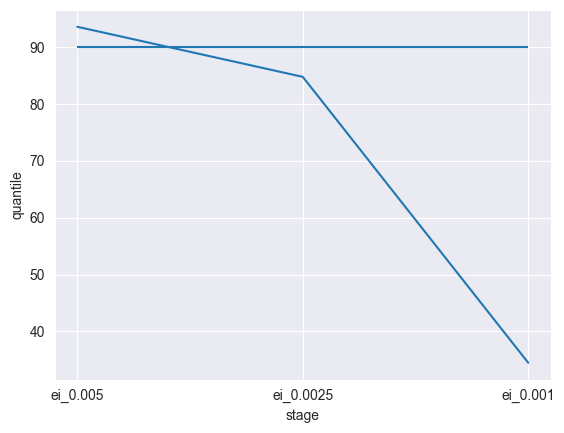

In [65]:
names = []
mean = []
std = []
quantile_95 = []
for mass_error in [0.005, 0.0025, 0.001]:
    col_name_ei = 'ei_'+str(mass_error)
    result_temp = nist_sampled[col_name_ei].describe()
    names.append(col_name_ei)
    quantile_95.append(nist_sampled[col_name_ei].quantile(0.05))
    mean.append(result_temp['mean'])
    std.append(result_temp['std'])
    # break
result_df = pd.DataFrame(zip(names, mean,quantile_95, std), columns=['stage','mean', 'quantile', 'std'])
sns.lineplot(result_df, x = 'stage', y = 'quantile')
plt.hlines(y = 90, xmin=result_df.iloc[0]['stage'], xmax=result_df.iloc[-1]['stage'])

In [67]:
from toolsets.mass_to_formula import MolecularFormula, atom_mass_array, numpy_formula_format,atom_list
from toolsets.denoising_related_functions import prep_formula
import itertools
from toolsets.std_list_prep import calculate_precursormz
import numpy as np
from molmass import Formula
from toolsets.mass_to_formula import atom_list
def get_allowed_formula(all_possible_candidate_formula, element):

    idx = atom_list.index(element)
    all_allowed_candidate_formula = np.copy(all_possible_candidate_formula)
    pop_idx = []
    for i in range(len(all_possible_candidate_formula)):
        if np.max(all_possible_candidate_formula[i][0:idx])==0 and np.max(all_possible_candidate_formula[i][idx+1:])==0:
            pop_idx.append(i)
    all_allowed_candidate_formula = np.delete(all_allowed_candidate_formula, pop_idx, axis=0)
    # all_allowed_candidate_formula.append(all_possible_candidate_formula[i])
    return(all_allowed_candidate_formula)
def get_all_allowed_formula(all_possible_candidate_formula, elements):
    all_allowed_candidate_formula = np.copy(all_possible_candidate_formula)
    for element in elements:
        all_allowed_candidate_formula = get_allowed_formula(all_allowed_candidate_formula, element = element)
    return(all_allowed_candidate_formula)
def math_check(smiles, adduct):
    precursor_mz = calculate_precursormz(smiles, adduct)
    formula = prep_formula(smiles, adduct)
    precursor_formula = MolecularFormula()

    precursor_formula.from_string(Formula(formula).formula)
    precursor_data = precursor_formula.get_data()
    formula_range = [range(x + 1) for x in precursor_data]
    forbidden_elements = ['C','N']
    if 'Na' in formula:
        forbidden_elements.append('Na')
    elif 'K' in formula:
        forbidden_elements.append('K')
    elif 'Cl' in formula:
        forbidden_elements.append('Cl')
    all_possible_candidate_formula = np.array(
        list(itertools.product(*formula_range)), numpy_formula_format)
    all_allowed_candidate_formula = get_all_allowed_formula(all_possible_candidate_formula, elements=forbidden_elements)
    all_possible_mass = np.sum(
        atom_mass_array * all_allowed_candidate_formula, axis=1)
    return(all_possible_mass)
    all_possible_mass.sort()
    diff = np.diff(all_possible_mass)
    allowed_region = (len(all_possible_mass)-len(diff[diff<=0.005]))*0.005*2
    return(allowed_region/precursor_mz)

In [6]:
from toolsets.mass_to_formula import MolecularFormula

In [19]:
from molmass import Formula

In [2]:
nist_selected = pd.read_csv(os.path.join(master_dir, 'nist_selected.csv'))

NameError: name 'pd' is not defined

In [25]:
nist_sampled = nist_selected.sample(2000)

In [56]:
allowed_percent = []
for index, row in tqdm(nist_sampled.iterrows(), total= len(nist_sampled)):
    try:
        allowed_percent.append(math_check(row['Smiles'], row['Precursor_type']))
    except:
        allowed_percent.append(np.NAN)

100%|██████████| 2000/2000 [06:07<00:00,  5.43it/s]


In [59]:
nist_sampled['allowed_percent']=allowed_percent

In [77]:
nist_sampled.sort_values(by = 'allowed_percent', ascending=False)

,Name,Precursor_type,Precursor_MZ,msms,spectral_entropy,Spectrum_type,Instrument_type,Instrument,Sample_inlet,Ionization,Collision_energy,Ion_mode,Inchikey,Smiles,allowed_percent
394977,"(3.beta.,5.Xi.,9.Xi.)-23,28-Dihydroxyoleana-11...",[M+H]+,1089.584001,101.0594\t35.66\n105.0696\t36.56\n107.0852\t78...,3.714473,MS2,HCD,Orbitrap Fusion Lumos,direct flow injection,ESI,NCE=44%,P,IOKZOXALSJFDJR,CC1OC(OC2C(CO)OC(OC3C(O)C(CO)OC(O[CH]4CC[C]5(C...,0.652332
251769,Thalictoside VI,[M-H]-,1073.553798,323.0989\t57.74\n324.1024\t8.89\n325.1143\t2.5...,1.973398,MS2,IT-FT/ion trap with FTMS,Orbitrap Fusion Lumos,direct flow injection,ESI,NCE=35%,N,ATUHGDXZHWBGHX,C[CH]1O[CH](O[CH]2CO[CH](O[CH]3CC[C]4(C)C(CC[C...,0.640396
368160,1-O-(3-((Hexopyranosyl-(1->2)-6-deoxyhexopyran...,[M-H]-,1101.548713,101.0245\t14.09\n111.0085\t1.5\n112.0164\t2.2\...,1.982889,MS2,HCD,Orbitrap Fusion Lumos,direct flow injection,ESI,NCE=54%,N,UDPVBZZTXOCTNJ,CC1OC(OC2C(O)C(OC3CCC4(C)C(CCC5(C)C4CC=C4C6CC(...,0.628197
304266,"21,22,23-Trihydroxy-9,19-cyclolanost-24-en-3-y...",[M-H]-,959.522104,101.0243\t181.32\n113.0243\t321.58\n119.0349\t...,2.424720,MS2,HCD,Thermo Finnigan Elite Orbitrap,direct flow injection,ESI,NCE=30% 67eV,N,XYRFTNNAIDSPBG,CC(C)=CC(O)C(O)C(CO)C1CCC2(C)C3CCC4C(C)(C)C(OC...,0.627740
27583,1-Stearoyl-2-docosahexaenoyl-sn-glycero-3-phos...,[M-H]-,821.533809,78.959\t59.84\n83.0502\t2.3\n91.0552\t1.5\n93....,2.438685,MS2,HCD,Thermo Finnigan Elite Orbitrap,direct flow injection,ESI,NCE=35% 55eV,N,CLQKBJHAUYGCOB,CCC=CCC=CCC=CCC=CCC=CCC=CCCC(=O)O[CH](COC(=O)C...,0.595776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338445,"5-Bromo-2,3-dichloropyridine",[M+H]+,225.882043,51.9399\t3.7\n55.9343\t6.69\n56.9422\t4.2\n59....,2.814103,MS2,HCD,Thermo Finnigan Elite Orbitrap,direct flow injection,ESI,NCE=110% 49eV,P,XWSCOGPKWVNQSV,Clc1cc(Br)cnc1Cl,0.009164
415894,2-Amino-5-iodopyrimidine,[M+H]+,221.952271,52.018\t64.84\n52.0195\t2.2\n53.0258\t11.59\n5...,1.133686,MS2,HCD,Orbitrap Fusion Lumos,direct flow injection,ESI,NCE=65% 46eV,P,HAFKCGZQRIIADX,Nc1ncc(I)cn1,0.008651
207187,5-Fluoro-2-methoxyphenylboronic acid,[M+H]+,171.062329,51.0231\t52.05\n53.0386\t10.79\n55.0178\t1.8\n...,2.083162,MS2,HCD,Orbitrap Fusion Lumos,direct flow injection,ESI,NCE=50%,P,CCQKIRUMTHHPSX,COc1ccc(F)cc1B(O)O,NaN
405432,(4-Nitrophenyl)arsonic acid,[M+H]+,247.953470,63.0229\t1.8\n64.0307\t9.39\n65.0386\t5.99\n68...,2.545073,MS2,HCD,Thermo Finnigan Elite Orbitrap,direct flow injection,ESI,NCE=45% 22eV,P,FUUFQLXAIUOWML,O=[N+]([O-])c1ccc([As](=O)(O)O)cc1,NaN


In [64]:
instance = nist_sampled.sort_values(by = 'allowed_percent', ascending=False).iloc[0]

In [68]:
all_masses = math_check(instance['Smiles'], instance['Precursor_type'])

In [70]:
all_masses.sort()

In [71]:
diff = np.diff(all_masses)

In [82]:
pd.Series(diff).describe()

count    112529.000000
mean          0.009665
std           0.036088
min           0.002319
25%           0.003510
50%           0.005859
75%           0.005920
max           1.007826
dtype: float64

In [33]:
import seaborn as sns

In [4]:
nist_selected = pd.read_csv(os.path.join(master_dir, 'nist_selected.csv'))

In [5]:
nist_selected

,Name,Precursor_type,Precursor_MZ,msms,spectral_entropy,Spectrum_type,Instrument_type,Instrument,Sample_inlet,Ionization,Collision_energy,Ion_mode,Inchikey,Smiles
0,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",[M+NH4]+,1467.006049,45.96\t46.35\n597.48\t51.85\n598.5\t41.36\n599...,1.878742,MS2,Q-TOF,Agilent QTOF 6530,direct flow injection,ESI,8,P,LSHJMDWWJIYXEM,CCCCCC=CCC=CCCCCCCCC(=O)OC[CH](COP(=O)(O)OCC(O...
1,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",[M+NH4]+,1467.006049,597.5\t50.95\n599.5\t683.32\n1449.98\t999.0\n1...,1.581230,MS2,Q-TOF,Agilent QTOF 6530,direct flow injection,ESI,10,P,LSHJMDWWJIYXEM,CCCCCC=CCC=CCCCCCCCC(=O)OC[CH](COP(=O)(O)OCC(O...
2,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",[M+NH4]+,1467.006049,537.39\t55.94\n599.5\t999.0\n600.51\t42.26\n14...,1.074723,MS2,Q-TOF,Agilent QTOF 6530,direct flow injection,ESI,14,P,LSHJMDWWJIYXEM,CCCCCC=CCC=CCCCCCCCC(=O)OC[CH](COP(=O)(O)OCC(O...
3,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",[M+NH4]+,1467.006049,597.46\t41.86\n598.5\t45.15\n599.51\t999.0\n60...,1.364946,MS2,Q-TOF,Agilent QTOF 6530,direct flow injection,ESI,16,P,LSHJMDWWJIYXEM,CCCCCC=CCC=CCCCCCCCC(=O)OC[CH](COP(=O)(O)OCC(O...
4,"1',3'-Bis[1,2-dilinoleoyl-sn-glycero-3-phospho...",[M+NH4]+,1467.006049,598.49\t47.85\n599.5\t999.0\n600.5\t85.51\n144...,0.876845,MS2,Q-TOF,Agilent QTOF 6530,direct flow injection,ESI,20,P,LSHJMDWWJIYXEM,CCCCCC=CCC=CCCCCCCCC(=O)OC[CH](COP(=O)(O)OCC(O...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433034,(3'-sulfo)Gal.beta.-Cer(d18:1/22:0),[M-H]-,862.608358,150.9693\t589.81\n152.985\t540.56\n161.0445\t3...,3.044941,MS2,HCD,Orbitrap Fusion Lumos,direct flow injection,ESI,NCE=65% 108eV,N,UAKYQMHTPLVMJD,CCCCCCCCCCCCCC=C[CH](O)[CH](CO[CH]1O[CH](CO)[C...
433035,(3'-sulfo)Gal.beta.-Cer(d18:1/22:0),[M-H]-,862.608358,150.9693\t999.0\n152.985\t971.14\n161.0444\t36...,2.347491,MS2,HCD,Orbitrap Fusion Lumos,direct flow injection,ESI,NCE=76% 126eV,N,UAKYQMHTPLVMJD,CCCCCCCCCCCCCC=C[CH](O)[CH](CO[CH]1O[CH](CO)[C...
433036,(3'-sulfo)Gal.beta.-Cer(d18:1/22:0),[M-H]-,862.608358,150.9693\t999.0\n152.9851\t846.85\n164.9852\t2...,1.630674,MS2,HCD,Orbitrap Fusion Lumos,direct flow injection,ESI,NCE=88% 144eV,N,UAKYQMHTPLVMJD,CCCCCCCCCCCCCC=C[CH](O)[CH](CO[CH]1O[CH](CO)[C...
433037,(3'-sulfo)Gal.beta.-Cer(d18:1/22:0),[M-H]-,862.608358,150.9693\t999.0\n152.985\t826.27\n225.0061\t90.11,0.845987,MS2,HCD,Orbitrap Fusion Lumos,direct flow injection,ESI,NCE=100% 163eV,N,UAKYQMHTPLVMJD,CCCCCCCCCCCCCC=C[CH](O)[CH](CO[CH]1O[CH](CO)[C...


In [34]:
nist_selected.columns

Index(['Name', 'Precursor_type', 'Precursor_MZ', 'msms', 'spectral_entropy',
       'Spectrum_type', 'Instrument_type', 'Instrument', 'Sample_inlet',
       'Ionization', 'Collision_energy', 'Ion_mode', 'Inchikey', 'Smiles'],
      dtype='object')

In [35]:
nist_selected = nist_selected[nist_selected['Precursor_MZ']<=800]

In [36]:
nist_sampled=nist_selected.sample(2000)

In [37]:
nist_sampled.to_csv(os.path.join(master_dir, 'nist_sampled.csv'), index = False)

In [6]:
nist_sampled=pd.read_csv(os.path.join(master_dir, 'nist_sampled.csv'))

In [7]:
nist_sampled

,Name,Precursor_type,Precursor_MZ,msms,spectral_entropy,Spectrum_type,Instrument_type,Instrument,Sample_inlet,Ionization,Collision_energy,Ion_mode,Inchikey,Smiles
0,3-Hydroxy-4-methoxycinnamic acid,[M+H]+,195.065185,117.03\t12.19\n145.02\t28.57\n177.05\t999.0\n1...,0.609870,MS2,Q-TOF,Agilent QTOF 6530,direct flow injection,ESI,4,P,QURCVMIEKCOAJU,COc1ccc(C=CC(=O)O)cc1O
1,Alitame,[M-H]-,330.149301,70.0302\t5.29\n73.0121\t65.83\n85.0411\t44.66\...,2.963776,MS2,HCD,Thermo Finnigan Elite Orbitrap,direct flow injection,ESI,NCE=45% 29eV,N,IVBOUFAWPCPFTQ,C[CH](NC(=O)[CH](N)CC(=O)O)C(=O)NC1C(C)(C)SC1(C)C
2,"2-[(3,5-Difluorophenyl)formamido]acetic acid",[M+Cl]-,250.008802,72.0\t7.09\n73.0078\t999.0\n73.0104\t49.95\n74...,1.113483,MS2,HCD,Orbitrap Fusion Lumos,direct flow injection,ESI,NCE=100% 71eV,N,CRKGNCMDWYCYOJ,O=C(O)CNC(=O)c1cc(F)cc(F)c1
3,4-Bromo-3-fluoro-2-nitroaniline,[M+H]+,234.951294,50.0151\t56.94\n51.023\t3.9\n52.0183\t469.23\n...,2.827934,MS2,HCD,Orbitrap Fusion Lumos,direct flow injection,ESI,NCE=88%,P,DTMANVRIDHGRKN,Nc1ccc(Br)c(F)c1[N+](=O)[O-]
4,L-.beta.-Homoglutamine,[M+H]+,161.092068,55.054\t12.89\n56.0493\t6.79\n80.0493\t2.0\n81...,1.408233,MS2,HCD,Thermo Finnigan Elite Orbitrap,direct flow injection,ESI,NCE=50% 16eV,P,IDNSGZOFDGAHTI,NC(=O)CC[CH](N)CC(=O)O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Ethyl 4-[(trifluoroacetyl)amino]benzoate,[M+H]+,262.068554,77.0384\t48.05\n92.0493\t27.57\n93.0572\t8.99\...,2.058037,MS2,HCD,Thermo Finnigan Elite Orbitrap,direct flow injection,ESI,NCE=45% 23eV,P,QHYQXLZAPVFNKW,CCOC(=O)c1ccc(NC(=O)C(F)(F)F)cc1
1996,Altretamine,[M+H]+,211.166571,71.0601\t67.73\n96.0554\t42.16\n97.0588\t1.1\n...,0.765366,MS2,HCD,Thermo Finnigan Elite Orbitrap,direct flow injection,ESI,NCE=50% 21eV,P,UUVWYPNAQBNQJQ,CN(C)c1nc(N(C)C)nc(N(C)C)n1
1997,"N,N'-Diacetylchitobiose",[M+H]+,425.176586,126.0548\t4.0\n186.0758\t17.58\n204.0862\t999....,1.042613,MS2,HCD,Thermo Finnigan Elite Orbitrap,direct flow injection,ESI,NCE=10% 8eV,P,PLJAKLUDUPBLGD,CC(=O)N[CH](C=O)[CH](O)[CH](O[CH]1O[CH](CO)[CH...
1998,"1-Amino-4-chloroanthra-9,10-quinone",[M+H]+,258.031632,105.0333\t39.46\n179.9846\t102.2\n222.0549\t27...,0.866827,MS2,IT-FT/ion trap with FTMS,Thermo Finnigan Elite Orbitrap,direct flow injection,ESI,NCE=35%,P,AWACQBFBMROGQC,Nc1ccc(Cl)c2c1C(=O)c1ccccc1C2=O


In [10]:
from toolsets.denoising_related_functions import denoise_h
from toolsets.search import string_search

In [13]:
import numpy as np

In [8]:
from toolsets.denoising_related_functions import denoise_h

In [11]:
nist_obi = string_search(nist_sampled, 'Instrument', 'Agilent QTOF 6530', reverse=True)

In [14]:
for mass_error in [0.005]:
    msms_d = []
    ei = []
    for index, row in tqdm(nist_obi.iterrows(), total = len(nist_obi)):
        try:
            results = denoise_h(row['msms'], row['Smiles'], row['Precursor_type'], reference_db_sorted, mass_error=mass_error)
            msms_d.append(results[0])
            ei.append(results[1])
        except:
            msms_d.append(np.NAN)
            ei.append(np.NAN)
    col_name_msms = 'msms_dw_'+str(mass_error)
    col_name_ei = 'eiw_'+str(mass_error)
    nist_obi[col_name_msms]=msms_d
    nist_obi[col_name_ei]=ei

100%|██████████| 1908/1908 [01:53<00:00, 16.77it/s]


In [19]:
import seaborn as sns

In [35]:
nist_obi[nist_obi['eiw_0.005']>90]['eiw_0.005'].describe()

count    1862.000000
mean       99.524255
std         1.372535
min        90.202740
25%        99.880815
50%       100.000000
75%       100.000000
max       100.000000
Name: eiw_0.005, dtype: float64

In [36]:
figs_dir ='/Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/figs'

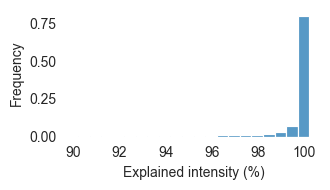

In [49]:
fig = plt.figure(figsize = (3.33, 2))#43
ax = fig.add_subplot()
sns.histplot(nist_obi[nist_obi['eiw_0.005']>90]['eiw_0.005'], stat='probability', binwidth=0.5)
plt.grid(False)
ax.set_facecolor('white')
ax.set_xlabel('Explained intensity (%)')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig(os.path.join(figs_dir, 'ei_distribution_nist.png'))

In [140]:
import seaborn as sns

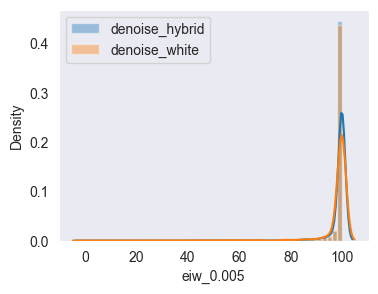

In [144]:
fig = plt.figure(figsize = (4, 3))#43
ax = fig.add_subplot()
#
sns.distplot(nist_sampled['ei_0.005'], label = 'denoise_hybrid')
sns.distplot(nist_sampled['eiw_0.005'], label = 'denoise_white')
# sns.lineplot(x = range(1,14), y = ns_means)
# sns.histplot(library_bad_quality['normalized_entropy'], label = 'low_quality')
# plt.vlines(x = 0.8, ymin=0, ymax=1.8, color = 'red')
plt.grid(False)
plt.legend()

In [137]:
nist_sampled['eiw_0.005'].describe()

count    2000.000000
mean       98.217513
std         7.377559
min         0.000000
25%        99.687300
50%       100.000000
75%       100.000000
max       100.000000
Name: eiw_0.005, dtype: float64

In [138]:
nist_sampled['ei_0.005'].describe()

count    1997.000000
mean       98.714217
std         6.091633
min         0.000000
25%        99.830600
50%       100.000000
75%       100.000000
max       100.000000
Name: ei_0.005, dtype: float64

In [72]:
from toolsets.search import string_search, quick_search_values
from toolsets.std_list_prep import calculate_precursormz

In [55]:
nist_obi = string_search(nist_sampled, 'Instrument', 'Agilent QTOF 6530', reverse=True)

In [ ]:
nist_obi

In [84]:
nist_obi['ei_0.005'].quantile(0.025)

90.97379875

In [133]:

from multiprocessing import Pool
from toolsets.denoising_related_functions import translate_matrix_into_formula, evaluate_nl_blacklist
from toolsets.mass_to_formula import MolecularFormula, numpy_formula_format
import itertools
from itertools import repeat

In [77]:
from rdkit.Chem.rdMolDescriptors import CalcMolFormula
from rdkit import Chem

In [47]:
nist_sampled['ei_0.01'].describe()

count    1997.000000
mean       99.205529
std         4.425725
min         7.690820
25%       100.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: ei_0.01, dtype: float64

In [32]:
row

Name                                           Sialyl-Lea(d18:1/16:0)
Precursor_type                                                 [M-H]-
Precursor_MZ                                              1662.895987
msms                150.0547\t27.17\n151.039\t1.8\n152.034\t4.2\n1...
spectral_entropy                                             2.840401
Spectrum_type                                                     MS2
Instrument_type                                                   HCD
Instrument                                      Orbitrap Fusion Lumos
Sample_inlet                                    direct flow injection
Ionization                                                        ESI
Collision_energy                                        NCE=35% 115eV
Ion_mode                                                            N
Inchikey                                               KXERKVVUTGFVLK
Smiles              CCCCCCCCCCCCCC=C[CH](O)[CH](CO[CH]1OC(CO)[CH](...
allowed_percent     